### introduce the operators and label preparations

In [92]:
import numpy as np
from openfermion.ops.operators import FermionOperator
from openfermion.linalg import get_number_preserving_sparse_operator
from scipy.linalg import expm

def k(p, q):
    pq = FermionOperator("[{}^ {}]".format(q, p)) - FermionOperator("[{}^ {}]".format(p, q))
    return pq


def d(a,b,c,d):
    abcd = FermionOperator("[{}^ {}^ {} {}]".format(a,b,c,d)) - FermionOperator("[{}^ {}^ {} {}]".format(c,d,a,b))
    return abcd

# preparation for fermionoperator
op = []
for p in range(4,-1,-2):
    for q in range(6,p,-2):
        op.append(k(p,q) + k(p+1,q+1))

for p in range(4,-1,-2):
    for q in range(6,p,-2):
        op.append(d(p+1,p,q+1,q))

op_m = []
# transfer operator to matrix
for i in range(len(op)):
    op_m.append(
        get_number_preserving_sparse_operator(
            op[i], 8, 4,
            spin_preserving=True
            ).toarray()
        )
    
labels = ['[1 1 1 1 0 0 0 0]',
        ' [1 0 1 1 0 1 0 0]',
        ' [1 0 1 1 0 0 0 1]',
        ' [1 1 1 0 0 1 0 0]',
        ' [1 1 1 0 0 0 0 1]',
        ' [0 1 1 1 1 0 0 0]',
        ' [0 1 1 1 0 0 1 0]',
        ' [1 1 0 1 1 0 0 0]',
        ' [1 1 0 1 0 0 1 0]',
        ' [1 0 1 0 0 1 0 1]',
        ' [0 0 1 1 1 1 0 0]',
        ' [0 0 1 1 1 0 0 1]',
        ' [0 1 1 0 1 1 0 0]',
        ' [0 1 1 0 1 0 0 1]',
        ' [0 0 1 1 0 1 1 0]',
        ' [0 0 1 1 0 0 1 1]',
        ' [0 1 1 0 0 1 1 0]',
        ' [0 1 1 0 0 0 1 1]',
        ' [1 0 0 1 1 1 0 0]',
        ' [1 0 0 1 1 0 0 1]',
        ' [1 1 0 0 1 1 0 0]',
        ' [1 1 0 0 1 0 0 1]',
        ' [1 0 0 1 0 1 1 0]',
        ' [1 0 0 1 0 0 1 1]',
        ' [1 1 0 0 0 1 1 0]',
        ' [1 1 0 0 0 0 1 1]',
        ' [0 1 0 1 1 0 1 0]',
        ' [0 0 1 0 1 1 0 1]',
        ' [0 0 1 0 0 1 1 1]',
        ' [1 0 0 0 1 1 0 1]',
        ' [1 0 0 0 0 1 1 1]',
        ' [0 0 0 1 1 1 1 0]',
        ' [0 0 0 1 1 0 1 1]',
        ' [0 1 0 0 1 1 1 0]',
        ' [0 1 0 0 1 0 1 1]',
        ' [0 0 0 0 1 1 1 1]',
]

In [93]:
# # DISCO Solution - hardcoded for speed

# operator_sequence = np.array([11, 5, 2, 10, 11, 5, 2, 7, 1, 9, 12, 6, 7, 8])
# coefficients = np.array([
#     2.917352889,
#     0.8948483047,
#     -1.186780531,
#     -1.385093655,
#     2.806014218,
#     0.9223849545,
#     2.713723378,
#     0.2087934190,
#     2.356194490,
#     -3.141592654,
#     -1.435265476,
#     1.640329124,
#     -2.356194490,
#     1.698202866
# ])

# operator_sequence = operator_sequence[::-1]
# coefficients = coefficients[::-1]

# # Reference state
# reference_state = np.zeros(36)
# reference_state[0] = 1.0

In [94]:
#pick one single and one double operator to see what they did to each of the 36 vectors

single_operator = expm(op_m[5])
double_operator = expm(op_m[11])


In [95]:
# generate 36 matrices to see what each operator does
basis = []
for i in range(36):
    wavefunction = np.zeros(36)
    wavefunction[i] = 1.0
    basis.append(wavefunction)

single_operator_result = []
double_operator_result = []
for i in range (36):
    single_operator_result.append(np.matmul(single_operator,basis[i]))
    double_operator_result.append(np.matmul(double_operator,basis[i]))

single_operator_result = np.array(single_operator_result)
double_operator_result = np.array(double_operator_result)


In [96]:
#collect all the non-zero resultant states after operation
def all_elements_zero(lst):
    return all(element == 0 for element in lst)


def get_nonzero_result_indices(result_array):
    indices = []
    for i,result in enumerate(result_array):
        if all_elements_zero(result) == False:
            indices.append(i)
    return indices

single_indices = get_nonzero_result_indices(single_operator_result)
double_indices = get_nonzero_result_indices(double_operator_result)

def filter_results(result_array, non_zero_indices):
    results = []
    for i,index in enumerate(non_zero_indices):
        results.append(result_array[index])
    return results

single_filtered_results = filter_results(single_operator_result,single_indices)
double_filtered_results = filter_results(double_operator_result,double_indices)



In [97]:
# count how many states are generated

def count_non_zeros(result_array):
    counts = []
    for i, result in enumerate(result_array):
        count = np.count_nonzero(result != 0) - 1
        counts.append(count)
    return counts

single_transfer = count_non_zeros(single_operator_result)
double_transfer = count_non_zeros(double_operator_result)




#### conclusion: single operators may generate 0/1/3 new states 
#### conclusion: double operators may generate 0/1 new state
##### For now only take one of the single operation result for investigation: the 10th


In [98]:
#print out the label of nonzero states
a = 10 #modify when needed, a is the index of result you wanna check
test_wavefunction = single_operator_result[a]
print('This is the states after operation.')
for i,wavefunction in enumerate(test_wavefunction):
    if wavefunction != 0:
        print(labels[i])
print('This is the initial state \n{}, \nand it was operated with operator \n{}'. format(labels[a],op[5]))

This is the states after operation.
 [0 0 1 1 1 1 0 0]
 [0 1 1 0 1 1 0 0]
 [1 0 0 1 1 1 0 0]
 [1 1 0 0 1 1 0 0]
This is the initial state 
 [0 0 1 1 1 1 0 0], 
and it was operated with operator 
-1.0 [0^ 2] +
-1.0 [1^ 3] +
1.0 [2^ 0] +
1.0 [3^ 1]


###### create a dataframe containing some features: 
###### double/single operator?
###### act on which position?
###### any fixed oporder?
###### and etc.

In [99]:
import pandas as pd

columns = ['Fermion Operator', 'Double Operator', 'Single Operator', 'Distance','Initial Energy Level','0', '1', '2', '3', '4', '5', '6', '7']
df = pd.DataFrame(columns=columns)

data_to_append = []  # Create a list to hold the data for each operator

for i in range(len(op)):
    op_str = str(op[i])
    
    if op_str.count('+') == 3:
        double = 0
        single = 1
    else:
        double = 1
        single = 0
    
    # Initialize a dictionary to store the counts for this operator
    counts = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0}
    
    # Split the operator string by square brackets to find contents within []
    parts = op_str.split('[')
    # Store the position that the operator operates on
    available_numbers = []
    # Loop through the parts and look for numbers
    for part in parts:
        if ']' in part:
            # Extract the content inside square brackets
            content = part.split(']')[0].replace('^','')
            # Split the content by '^' to get individual numbers
            numbers = content.split()
            for number in numbers:
                if number.isdigit() and number in counts:
                    counts[number] = 1
                    available_numbers.append(int(number))      

    # for single operator the distance is positive
    # for double operator the distance is negative
    if single == 0:
        distance = -(available_numbers[2] - available_numbers[0])
        energy_level = -available_numbers[0] // 2
    else:
        distance = available_numbers[1] - available_numbers[0]
        energy_level = available_numbers[0] // 2
    
    # Create a new row data dictionary for this operator
    row_data = {
        'Fermion Operator': op_str,
        'Double Operator': double,
        'Single Operator': single,
        'Distance': distance,
        'Initial Energy Level': energy_level
    }
    row_data.update(counts)  # Add the counts as columns for this operator
    
    # Append the row data to the list
    data_to_append.append(row_data)

# Concatenate the list of data into a DataFrame
df = pd.concat([df] + [pd.DataFrame(data_to_append)], ignore_index=True)

# Fill NaN values with 0 in the DataFrame
df.fillna(0, inplace=True)

# # Print the updated DataFrame
# print(df)

df.to_excel('operator_information.xlsx')


In [100]:
import os
import glob
# Directory containing operator sequence files
input_directory = r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear'
# List of files matching the pattern 'oporder.x.y'
operator_files = glob.glob(os.path.join(input_directory, 'oporder.*.*'))

In [101]:
#store all data files inside one dataframe for analysis
df_pattern_dict = {} #generate dictionary for all features
for operator_file in operator_files:
    x, y = operator_file.split('.')[-2:]
    x = int(x)
    y = int(y)
    
    # if x==1:
        # Load operator sequence from the file
    operator_sequence = []
    with open(operator_file, 'r') as file:
        for line in file:
            operator_sequence.append(int(line.strip()))
    operator_sequence = operator_sequence [::-1]

    data_to_append_file = []
    for i, oporder in enumerate(operator_sequence):
        oporder = oporder - 1
        file_data = df.iloc[oporder]
        data_to_append_file.append(file_data)
    
    # Create a DataFrame for this file's data
    df_file = pd.DataFrame(data_to_append_file)
    df_file.fillna(0, inplace=True)
    
    # Store the DataFrame in the dictionary with a key based on the file name
    file_key = f"oporder_{x}_{y}"
    df_pattern_dict[file_key] = df_file

# Specify the Excel file name (change as needed)
excel_file = 'df_pattern_dict.xlsx'

# Create an ExcelWriter object
with pd.ExcelWriter(excel_file, engine='xlsxwriter') as writer:
    # Loop through the dictionary and write each DataFrame to a separate sheet
    for sheet_name, df in df_pattern_dict.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

# Save the Excel file
print(f"Data has been saved to {excel_file}")

Data has been saved to df_pattern_dict.xlsx


###### using heat map to show the features of operator on each step 
###### heat map 1: xlabel: file_name , ylabel: steps, colour: type of operator, intensity: distance
###### heat map 2: xlabel: ? , ylabel: file_name

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
#heat map 1
#extract data from df_pattern dictionary and put them all together
def featrue_extracter(feature_name,files = operator_files,dictionary = df_pattern_dict):
    featrues = []
    for file in files:
        x, y = file.split('.')[-2:]
        x = int(x)
        y = int(y)
        file_key = f"oporder_{x}_{y}"
        featrues.append(dictionary[file_key][feature_name].values)
    featrues = np.array(featrues)
    return featrues

def heatmap(feature,colorbar_min = None,colorbar_max = None):
    feature_1 = featrue_extracter(str(feature))
    ax = sns.heatmap(feature_1,cmap='bwr',yticklabels= False)
    ax.set(xlabel='Operators',ylabel='Files')
    ax.set_title('Operator {} for all files'.format(feature))
    if colorbar_min != None and colorbar_max != None:
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks(range(colorbar_min, colorbar_max + 1))
        print('there are {:.2%} operators operates from 0th energy level'.format(np.count_nonzero(abs(feature_1) == 0 )/np.size(feature_1)),'\n',
              'there are {:.2%} operators operates from 1st energy level'.format(np.count_nonzero(abs(feature_1) == 1)/np.size(feature_1)),'\n',
              'there are {:.2%} operators operates from 2nd energy level'.format(np.count_nonzero(abs(feature_1) == 2)/np.size(feature_1)),'\n',
              'there are {:.2%} operators operates from 3rd energy level'.format(np.count_nonzero(abs(feature_1) == 3)/np.size(feature_1)),sep = '')
        feature_2 = feature_1.copy()
        return feature_2
    return feature_1    

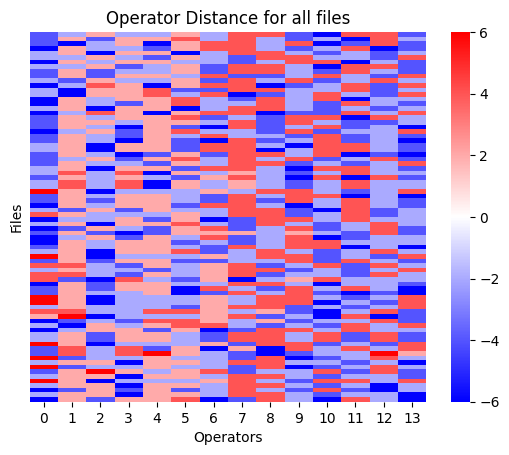

In [103]:
feature_distance = heatmap('Distance')

   for single operator the distance is positive - red\
   for double operator the distance is negative - blue\
   the operation usually initially starts with double operator, followed by single\
   single operator: usually take step of distance 2 from the 2nd to 6th operator, then step of distance 4 (distance 6 is mainly only used in first step)\
   usually single double alternately - SSDD/SSDS/DDSD/DDSS/...
   (mostly one or two consective operators of the same type, with very few exceptions)
   


there are 20.18% operators operates from 0th energy level
there are 43.84% operators operates from 1st energy level
there are 28.30% operators operates from 2nd energy level
there are 7.68% operators operates from 3rd energy level


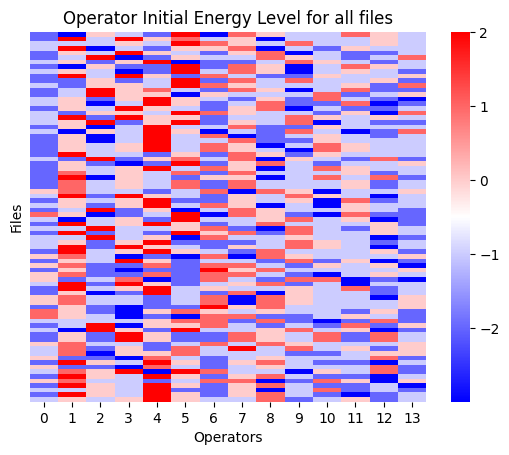

In [104]:
# heatmap 2
# looking for patterns of initial energy levels
# show difference between single and double operators

feature_energy_level = heatmap('Initial Energy Level',-2,2)

feature_1 = featrue_extracter('Initial Energy Level')

######
    Operators are mainly operating from the 1st energy level (starting from 0th)

Conclusion: \
for similar patterns in operation of different files,
1. operators mainly operate on 1st energy level,

2. oporder usually initially starts with double operator, followed by single

3. usually single double alternately - SSDD/SSDS/DDSD/DDSS/...
(mostly one or two consecutive operators of the same type, with very few exceptions)

4. single operator: usually take step of distance 2 from the 2nd to 6th operator, then step of distance 4 (distance 6 is mainly only used in first step)


## try to use histogram to print out t
for different operator sequence -- 排列组合from12，21，13，31，。。。to see the frequency for it to show
SS SD, DD, DS?
SSS,SSD,SDS,DSS,....


In [142]:
#search for operator sequences with same final states
operator_file_1 = [r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.1.1',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.1.10',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.1.4',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.1.6',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.1.7',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.2.10',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.2.2',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.2.3',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.2.6',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.2.7',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.3.3',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.3.5',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.3.6',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.3.8',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.4.1',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.4.3',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.4.5',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.4.6',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.4.7',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.4.8',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.5.10',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.5.2',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.5.6',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.5.7',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.6.1',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.6.10',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.6.2',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.6.4',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.6.6',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.6.9',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.7.2',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.7.4',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.7.6',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.7.7',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.7.9',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.8.1',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.8.2',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.8.3',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.8.4']
operator_file_2 = [r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.1.2',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.1.3',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.1.5',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.1.8',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.1.9',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.2.1',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.2.4',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.2.5',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.2.8',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.2.9',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.3.1',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.3.10',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.3.2',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.3.4',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.3.7',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.3.9',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.4.10',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.4.2',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.4.4',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.4.9',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.5.1',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.5.3',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.5.4',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.5.5',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.5.8',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.5.9',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.6.3',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.6.5',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.6.7',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.6.8',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.7.1',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.7.10',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.7.3',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.7.5',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.7.8',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.8.10',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.8.5',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.8.6',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.8.7',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.8.8',r'C:\Users\Alice Ling\Desktop\Summer intern\Coding\replicating energies\H4_linear\oporder.8.9']


In [148]:
#create dataframe to store operator sequence

def operator_sequence_storage(operator_file_group,group):

    # Create a list to store operator sequences
    column = ['Operator file','Group{}'.format(group),'Operator Number']
    df_operator_sequence = pd.DataFrame(columns=column)

    for operator_file in operator_file_group:
        # Load operator sequence from the file
        operator_sequence = []
        with open(operator_file, 'r') as file:
            for line in file:
                operator_sequence.append(int(line.strip()))
        operator_sequence = operator_sequence[::-1]

        df_operator_sequence = df_operator_sequence.append({
            'Operator file' :operator_file,
            'Group{}'.format(group) : group,
            'Operator Number' : operator_sequence
        }, ignore_index=True)
    return df_operator_sequence

df_operator_sequence_1 = operator_sequence_storage(operator_file_1,1)
df_operator_sequence_2 = operator_sequence_storage(operator_file_2,2)




C:\Users\Alice Ling\AppData\Local\Temp\ipykernel_620\670859058.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_operator_sequence = df_operator_sequence.append({
C:\Users\Alice Ling\AppData\Local\Temp\ipykernel_620\670859058.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_operator_sequence = df_operator_sequence.append({
C:\Users\Alice Ling\AppData\Local\Temp\ipykernel_620\670859058.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_operator_sequence = df_operator_sequence.append({
C:\Users\Alice Ling\AppData\Local\Temp\ipykernel_620\670859058.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_operator_sequence 

In [163]:
#function to produce histogram
def pattern_counts_histogram_producer(dataframe,combination_number,x_tick_fontsize = 7,annotate = '', frequency_adjuster = -1):
    import matplotlib.pyplot as plt
    from itertools import permutations

    # Generate the 12 numbers
    numbers = list(range(1, 13))

    # Generate all combinations of the numbers
    combinations_list = list(permutations(numbers, combination_number))  # Change the '2' to the desired combination length

    # Create a DataFrame with columns as combinations
    combination_count = {combo:0 for combo in combinations_list}

    for index, row in dataframe.iterrows():
        operator_numbers = row['Operator Number']

        for i in range(len(operator_numbers)- 1 + combination_number):
            combo = tuple(operator_numbers[i:i + combination_number])
            if combo in combination_count:
                combination_count[combo] += 1

    df_operator_sequence_2_consective = pd.DataFrame.from_dict(combination_count,orient='index',columns=['Frequency'])

    df_operator_sequence_2_consective.reset_index(inplace=True)
    df_operator_sequence_2_consective = df_operator_sequence_2_consective.rename(columns={'index': 'Combination'}).sort_values(by='Frequency', ascending=False)


    # Filter out combinations with frequency = 0
    df_operator_sequence_2_consective_filtered = df_operator_sequence_2_consective[df_operator_sequence_2_consective['Frequency'] > frequency_adjuster]

    # Plot a histogram
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(df_operator_sequence_2_consective_filtered)), df_operator_sequence_2_consective_filtered['Frequency'], tick_label=[str(combo) for combo in df_operator_sequence_2_consective_filtered['Combination']])
    plt.xlabel('Combinations')
    plt.ylabel('Frequency')
    plt.title('Frequency of {}-Consective Combinations in Files'.format(combination_number))
    plt.annotate('*{} There are in total {} files with same final states and energies.\n '.format(annotate,len(dataframe)), xy=(0, -0.3), xycoords='axes fraction',fontsize=8)
    plt.xticks(rotation=90,fontsize=x_tick_fontsize)
    plt.tight_layout()
    plt.show()

    

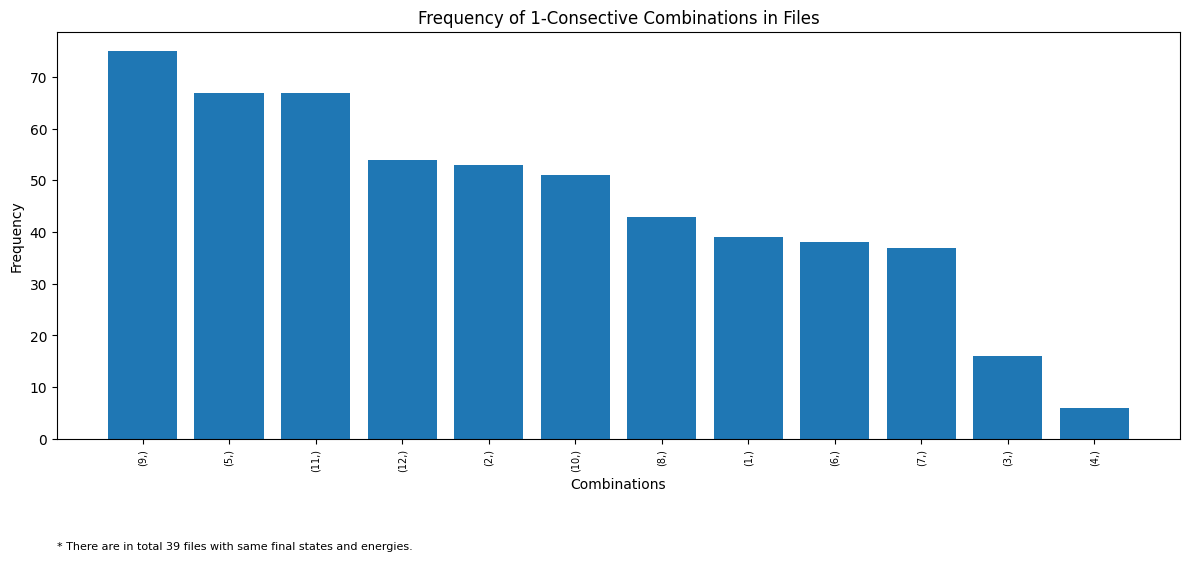

In [154]:
pattern_counts_histogram_producer(df_operator_sequence_1,1,annotate = '', frequency_adjuster = -1)

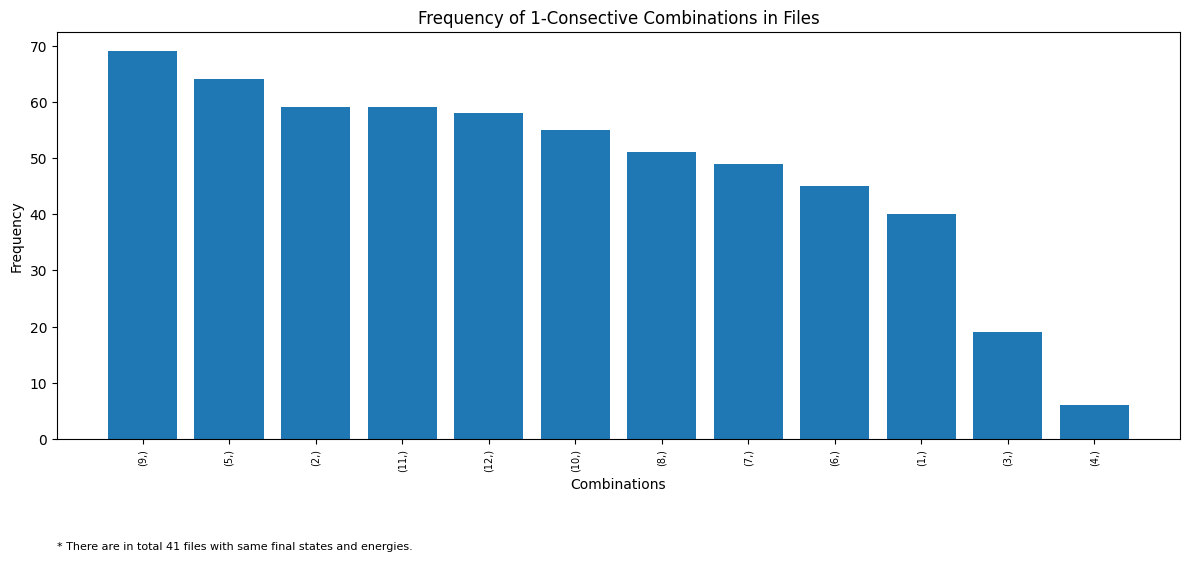

In [155]:
pattern_counts_histogram_producer(df_operator_sequence_2,1,annotate = '', frequency_adjuster = -1)

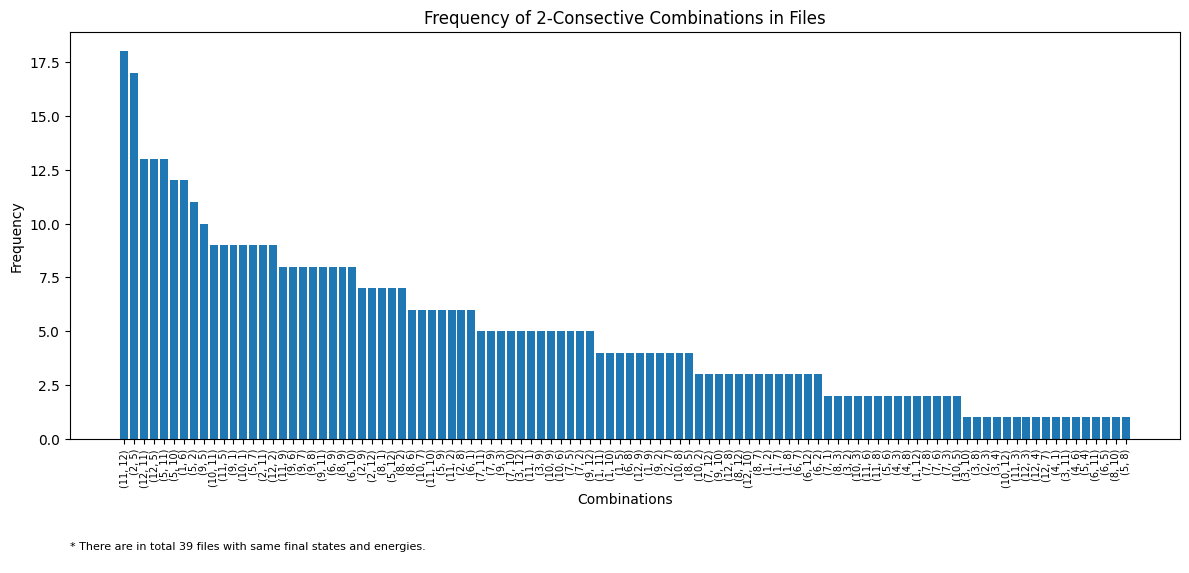

In [156]:
pattern_counts_histogram_producer(df_operator_sequence_1,2,annotate = '', frequency_adjuster = -1)

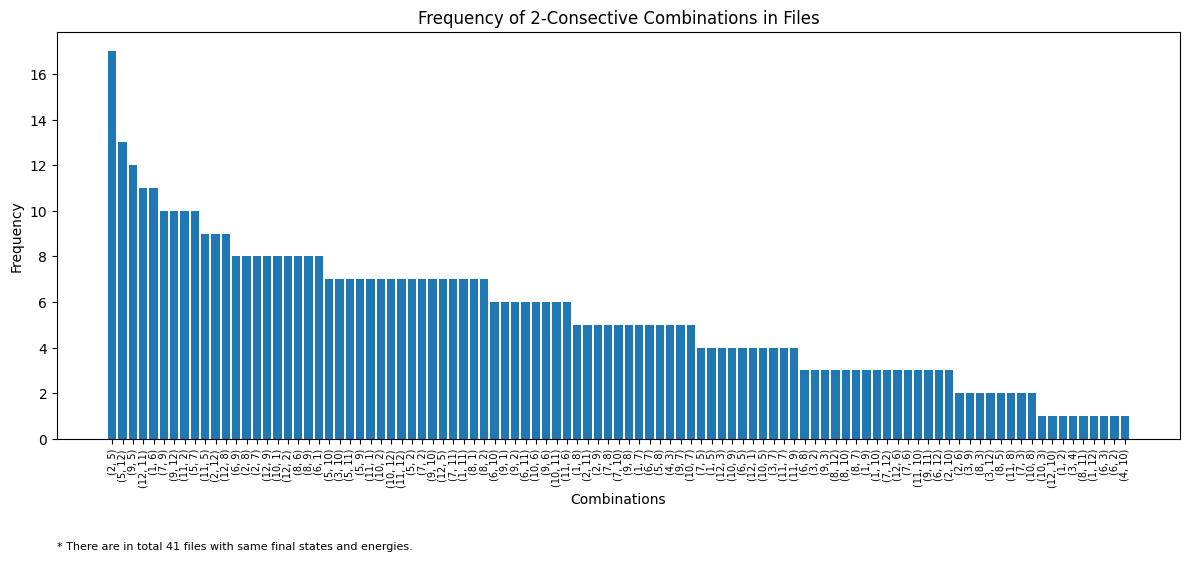

In [157]:
pattern_counts_histogram_producer(df_operator_sequence_2,2,annotate = '', frequency_adjuster = -1)

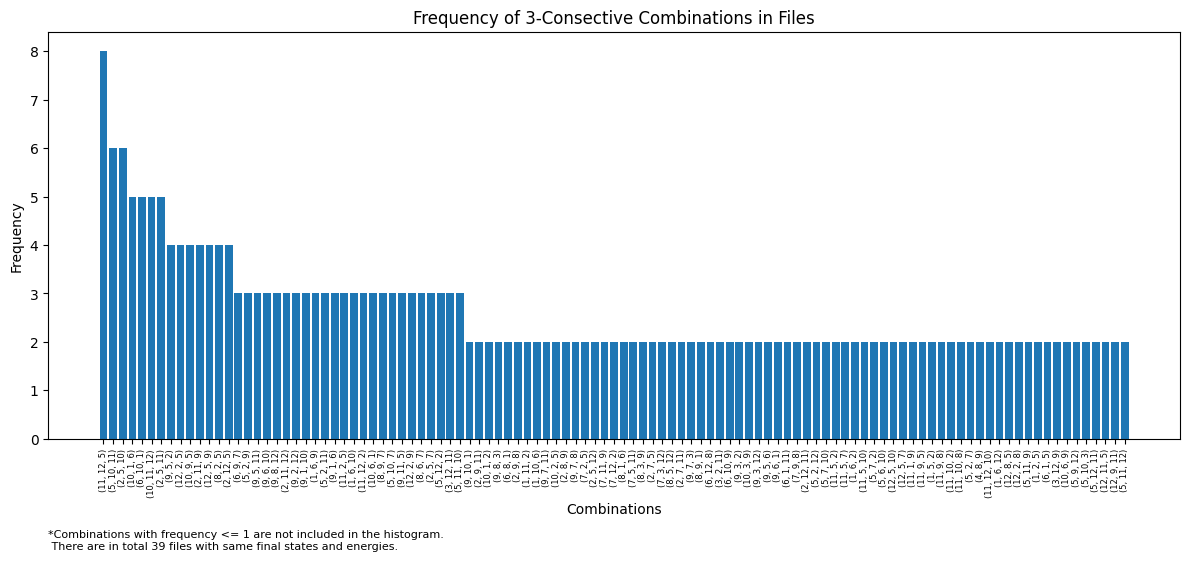

In [171]:
pattern_counts_histogram_producer(df_operator_sequence_1,3,x_tick_fontsize = 6,annotate = 'Combinations with frequency <= 1 are not included in the histogram.\n', frequency_adjuster = 1)

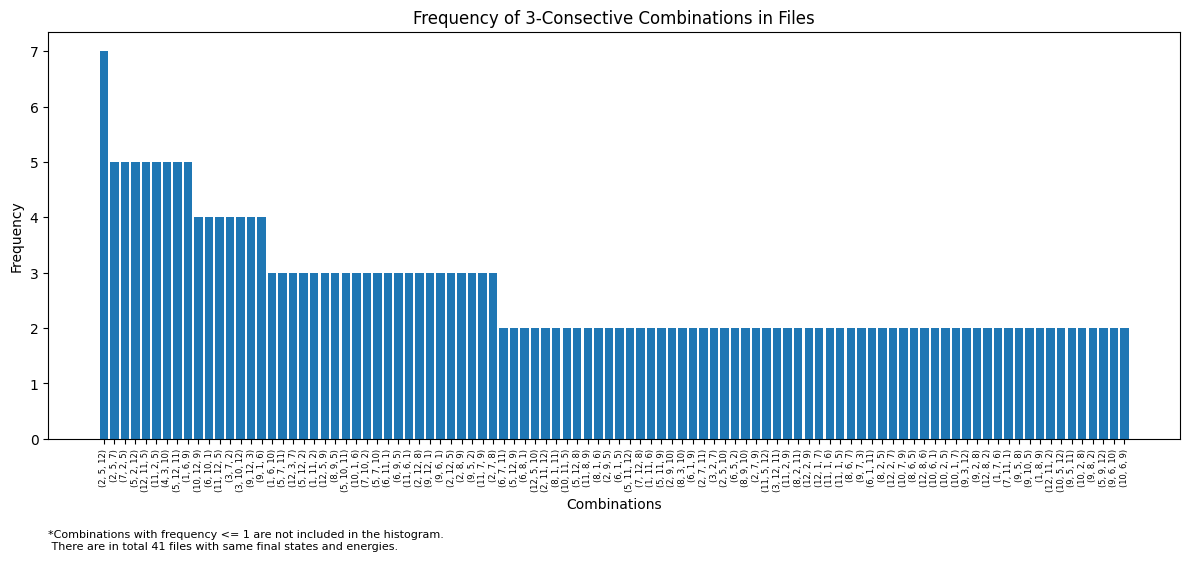

In [168]:
pattern_counts_histogram_producer(df_operator_sequence_2,3,x_tick_fontsize = 6,annotate = 'Combinations with frequency <= 1 are not included in the histogram.\n', frequency_adjuster = 1)